<h1>Generiranje zgodnih slika preko svojstvenih vrijednosti matrica</h1>

In [1]:
import platform

In [2]:
platform.platform()

'Linux-5.4.143-1-MANJARO-x86_64-with-glibc2.33'

In [3]:
platform.python_version()

'3.9.6'

In [4]:
from pylab import *

In [5]:
import cmath

In [6]:
import itertools as it

In [7]:
def flatten(a):
    for elem in a:
        if type(elem) in (tuple,list):
            for i in flatten(elem):
                yield i
        else:
            yield elem

<div style="background-color: #F5FFFA; color: #000000; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px; overflow:auto">
<h3>1. zadatak</h3>
<p style="line-height:30px;">
<p>Promatramo kompleksne kvadratne matrice reda 16 čiji elementi su definirani sljedećom formulom</p>
<p>
$$
a_{kl}=\begin{cases}
e^{i\varphi},& \text{ako je } k< l\\
e^{-i\xi\varphi},& \text{ako je } k>l\\
1,& \text{inače}          
\end{cases}
$$
</p>
<p>pri čemu je $i=\sqrt{-1}$, $\varphi\in[0,2\pi]$, a $\xi\in\mathbb{C}$ je neka konstanta.
</p>
<ol style="list-style-type:lower-alpha;">
<li style="margin-bottom:8px;line-height:30px;"> Za fiksni $\xi\in\big\{\frac{1}{6},2,5,50,70,100\big\}$ i za svaki $\varphi\in[0,2\pi]$  odredite sve svojstvene vrijednosti svih promatranih matrica i prikažite ih na slici kao točke u kompleksnoj ravnini.</li>
<li style="margin-bottom:8px;line-height:30px;">Za $\xi=2$ i $\varphi=1.2$ konstruirajte kvadratnu matricu reda 16 čiji elementi su zadani gore spomenutom formulom. Odredite sve svojstvene vektore te matrice i smjestite ih u retke jedne matrice $S$. Elementi matrice $S$ su općenito kompleksni brojevi. Ako je $S=[s_{ij}]$, neka su tada matrice $S_1$ i $S_2$ definirane s 
$$S_1=\big[\:|s_{ij}|\:\big],\quad S_2=[\arg{s_{ij}}]$$
pri čemu je $|s_{ij}|$ apsolutna vrijednost kompleksnog broja $s_{ij}$, a $\arg{s_{ij}}$ je argument kompleksnog broja $s_{ij}$.
Pomoću <tt>matshow</tt> funkcije iz <tt>matplotlib</tt> modula prikažite grafički matrice $S_1$ i $S_2$.</li>
</ol>
</div>
<h3>Rješenje</h3>

In [8]:
def Matrica(ksi,fi):
    M=[ [1 for i in range(16)] for j in range(16)]
    for i in range(16):
        for j in range(16):
            if i<j: M[i][j] = e**(1j*fi)
            if i>j: M[i][j] = e**(-1j*ksi*fi)
    return matrix(M)

<h4>a) dio</h4>
<p style="line-height:25px;">Kako je segment $[0,2\pi]$ neprebrojiv, nemoguće je na računalu proći kroz sve elemente tog segmenta. Potrebno je napraviti diskretizaciju tog segmenta tako da s varijablom $\varphi$ kroz njega prođemo s nekim malim pomakom, npr. s pomakom $0.003$.</p>

In [9]:
ksi=[1/6,2,5,50,70,100]

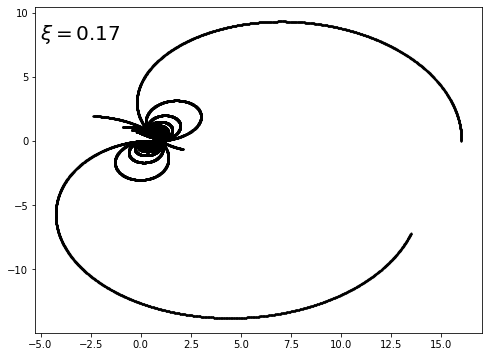

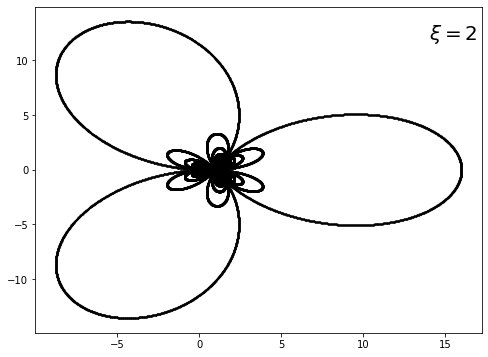

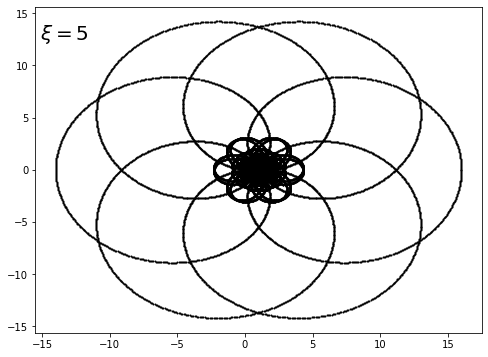

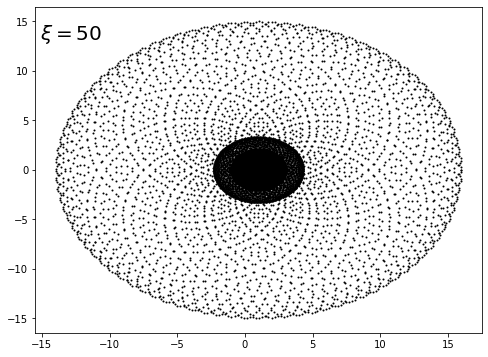

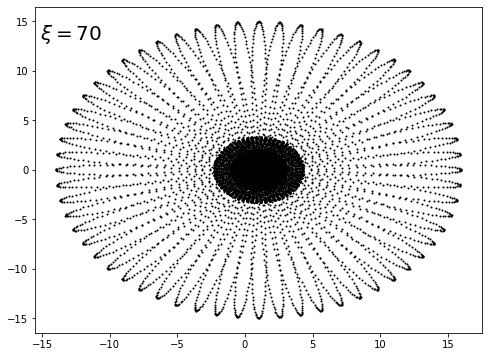

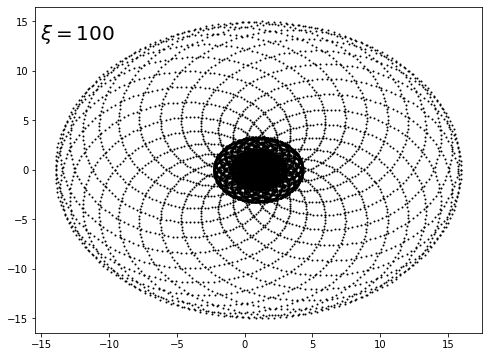

In [10]:
for i in range(1, 7):
    lista=[Matrica(ksi[i-1],fi) for fi in ogrid[0:2*np.pi:2000j]]
    lista2 = map(lambda x: list(eigvals(x)),lista)
    sv=list(flatten(lista2))
    listaX=list(map(lambda x: x.real, sv))
    listaY=list(map(lambda x: x.imag, sv))
    fig,ax = subplots(figsize=(8,6))
    if i != 2:
        text(0.01,0.9,r'$\xi={}$'.format(round(ksi[i-1],2)),fontsize=20,transform=ax.transAxes)
    else:
        text(0.99,0.9,r'$\xi={}$'.format(round(ksi[i-1],2)),fontsize=20,ha='right',transform=ax.transAxes)
    scatter(listaX,listaY, c='k', s=1, marker='o', alpha=1)

<h4>b) dio</h4>
<p style="line-height:25px;">Dodatno se možete poigrati s različitim opcijama za varijable <tt>cmap</tt> i <tt>interpolation</tt>.<br>
<ul>
<li style="margin-bottom:5px;"><tt>cmap</tt> daje paletu boja za bojanje slike.</li>
<li><tt>interpolation</tt> opisuje način interpoliranja vrijednosti boja za piksele.</li>
</ul>
</p>

In [11]:
ksi=2

In [12]:
A=Matrica(ksi,1.2)

In [13]:
S1 = matrix(list(map(lambda x: list(map(lambda y: abs(y), x)), eig(A)[1].tolist())))
S2 = matrix(list(map(lambda x: list(map(lambda y: cmath.phase(y), x)), eig(A)[1].tolist())))

Grafički prikaz matrice $S_1$ u dvije različite palete boja

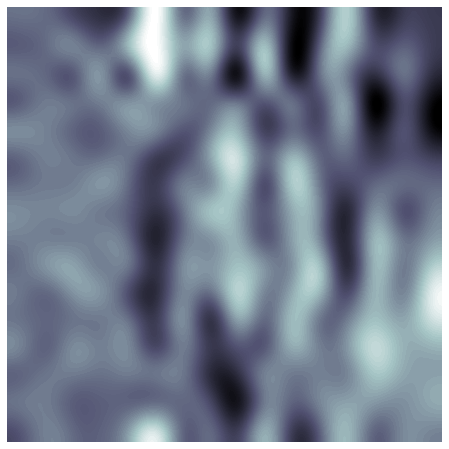

In [14]:
fig, ax = subplots(figsize=(8,8))
ax.matshow(S1,cmap='bone',interpolation='lanczos')
axis('off');

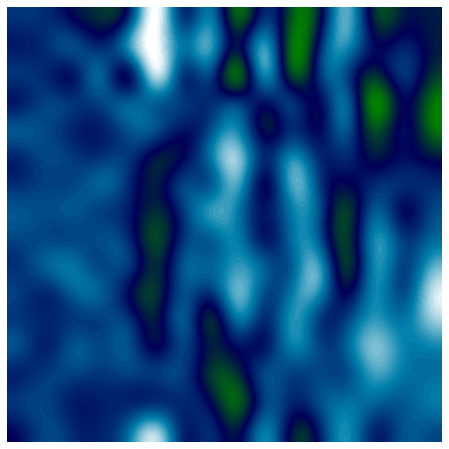

In [15]:
fig, ax = subplots(figsize=(8,8))
ax.matshow(S1,cmap='ocean',interpolation='lanczos')
axis('off');

Grafički prikaz matrice $S_2$ u dvije različite palete boja

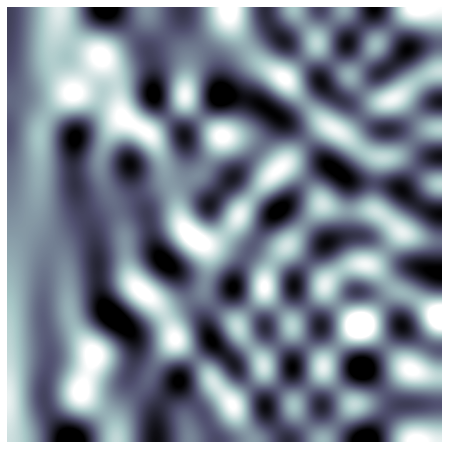

In [16]:
fig, ax = subplots(figsize=(8,8))
ax.matshow(S2,cmap='bone',interpolation='lanczos')
axis('off');

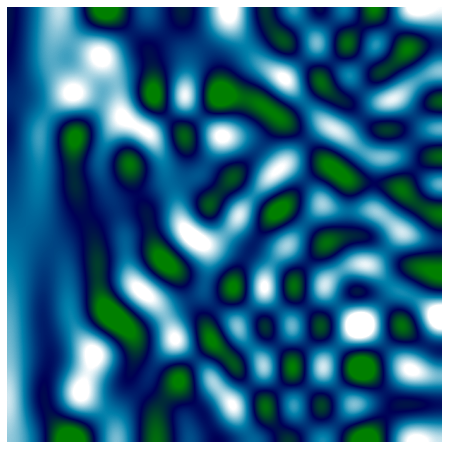

In [17]:
fig, ax = subplots(figsize=(8,8))
ax.matshow(S2,cmap='ocean',interpolation='lanczos')
axis('off');

<div style="background-color: #F5FFFA; color: #000000; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px; overflow:auto">
<h3>2. zadatak</h3>
<p style="line-height:30px;">Promatramo kompleksne kvadratne matrice reda 16 čiji elementi su definirani sljedećom formulom</p>
<p>
$$
a_{kl}=\begin{cases}
e^{l\varphi\operatorname{sign}{\!(k-l)}\cdot2\pi i},& \text{ako je } |k-l|=1\\
\qquad1,& \text{ako je } |k-l|=3\\
\qquad0,& \text{inače}          
\end{cases}
$$
</p>
<p>pri čemu je $i=\sqrt{-1}$, $\varphi\in[0,2\pi]$.</p>
<ol style="list-style-type:lower-alpha;">
<li style="margin-bottom:8px;line-height:30px;"> Za svaki $\varphi\in[0,2\pi]$ generirajte opisanu matricu, odredite sve svojstvene vrijednosti svih takvih matrica i prikažite ih na slici kao točke u kompleksnoj ravnini. Sve točke neka budu prikazane crnom bojom.</li>
<li style="margin-bottom:8px;line-height:30px;">Svojstvene vrijednosti iz a) dijela zadatka prikažite grafički kao točke u kompleksnoj ravnini, ali tako da za svaku matricu koristite različitu boju kojom ćete obojati sve njezine svojstvene vrijednosti.</li>
</ol>
</div>
<h3>Rješenje</h3>

In [18]:
def Matrica2(fi,n):
    M=[ [0 for i in range(n)] for j in range(n)]
    for i in range(n):
        for j in range(n):
            if abs(i-j)==1: M[i][j] = e**(1j*2*pi*sign(i-j)*j*fi)
            if abs(i-j)==3: M[i][j] = 1
    return matrix(M)

<h4>a) dio</h4>
<p style="line-height:25px;">Kako je segment $[0,2\pi]$ neprebrojiv, nemoguće je na računalu proći kroz sve elemente tog segmenta. Potrebno je napraviti diskretizaciju tog segmenta tako da s varijablom $\varphi$ kroz njega prođemo s nekim malim pomakom, npr. s pomakom $0.002$.</p>

In [19]:
lista_matrica=[Matrica2(fi,16) for fi in list(np.ogrid[0:2*pi:3000j])]

In [20]:
svojstvene_vrijednosti = list(map(lambda x: list(eigvals(x)),lista_matrica))
sv = list(flatten(svojstvene_vrijednosti))

In [21]:
listaX=list(map(lambda x: x.real, sv))
listaY=list(map(lambda x: x.imag, sv))

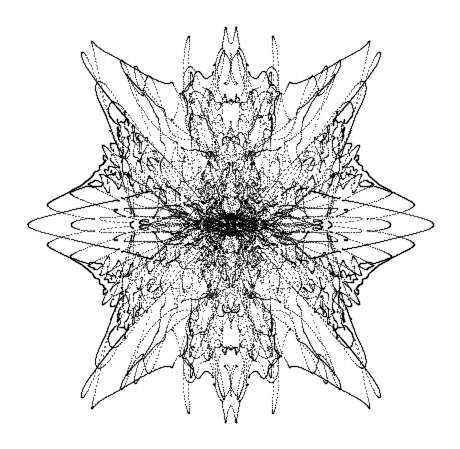

In [22]:
fig, ax = subplots(figsize=(8,8),facecolor='white')
scatter(listaX,listaY, c='k', s=0.05, marker='o', alpha=1)
axis('off');

<h4>b) dio</h4>

In [23]:
boje=list(flatten([list(np.random.rand(1))*16 for k in range(len(svojstvene_vrijednosti))]))

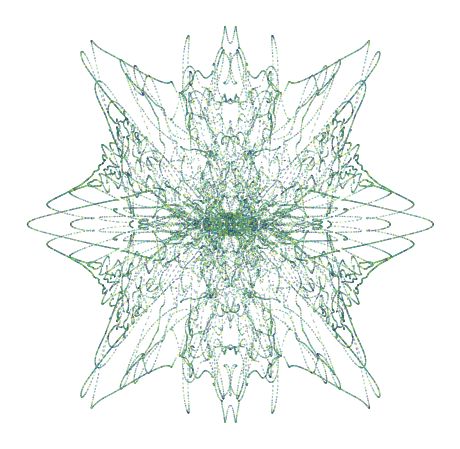

In [24]:
fig, ax = subplots(figsize=(8,8),facecolor='white')
scatter(listaX,listaY, c=boje, s=0.05, marker='o', alpha=1)
axis('off');

<div style="background-color: #F5FFFA; color: #000000; border: 2px solid #B0C4DE; border-radius: 15px; padding:0px 10px 25px; overflow:auto">
<h3>3. zadatak</h3>
<p style="line-height:30px;">Neka je $\mathcal{T}$ skup svih kvadratnih matrica reda 16 sa sljedećim svojstvima.</p>
<ul>
    <li style="margin-bottom:5px;">Svi elementi na prvoj dijagonali iznad glavne dijagonale su jednaki $1$.</li>
    <li style="margin-bottom:5px;">Svi elementi na prvoj dijagonali ispod glavne dijagonale su jednaki $1$ ili $-1$.</li>
    <li style="margin-bottom:5px;">Elementi na preostalim pozicijama su jednaki nula.</li>
</ul>
<p style="line-height:25px;">Napišite program koji će izgenerirati sve matrice iz skupa $\mathcal{T}$ i na temelju toga odredite kardinalni broj skupa $\mathcal{T}$. Nadalje, odredite sve svojstvene vrijednosti svih matrica iz skupa $\mathcal{T}$ i prikažite ih kao točke u kompleksnoj ravnini.</p>
</div>
<h3>Rješenje</h3>

In [25]:
def Matrica3(dijagonala):
    d = len(dijagonala)+1
    M=[ [0 for i in range(d)] for j in range(d)]
    for i in range(d):
        for j in range(d):
            if j == i+1: 
                M[i][j]=1
            elif j == i-1:
                M[i][j]=dijagonala[j]
            else:
                M[i][j]=0
    return matrix(M)

In [26]:
dijagonale = list(it.product([-1,1],repeat=15))
M1 = map(lambda x: list(eigvals(Matrica3(x))), dijagonale)
M2 = list(flatten(M1))

In [27]:
listaX = list(map(lambda x: x.real,M2))
listaY = list(map(lambda x: x.imag,M2))

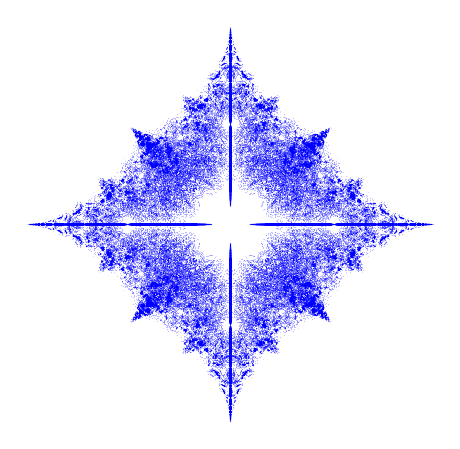

In [28]:
fig, ax = subplots(figsize=(8,8),facecolor='white')
scatter(listaX,listaY, c='b', s=0.002, marker='o', alpha=1)
axis('off');

<p style="line-height:20px;">Za ljepšu sliku možemo sa slike maknuti svojstvene vrijednosti kojima su realni ili imaginarni dijelovi jednaki nula.</p>

In [29]:
M1 = map(lambda x: list(eigvals(Matrica3(x))), dijagonale)
M3 = list(filter(lambda x: (abs(x.real) > 0.01) and (x.imag != 0), flatten(M1)))

In [30]:
listaX = list(map(lambda x: x.real,M3))
listaY = list(map(lambda x: x.imag,M3))

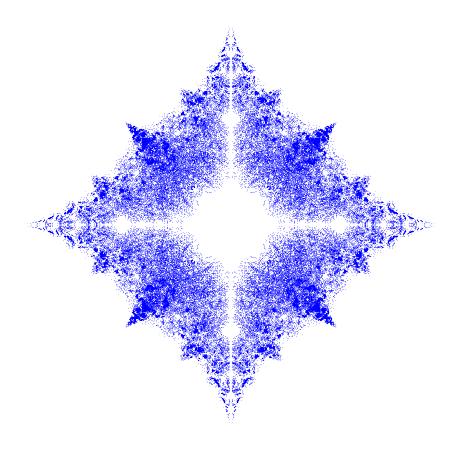

In [31]:
fig, ax = subplots(figsize=(8,8),facecolor='white')
scatter(listaX,listaY, c='b', s=0.002, marker='o', alpha=1)
axis('off');